In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Lenovo\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df=pd.read_csv("laptop_data.csv")
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


### Dropped unamed column

In [3]:
df.drop("Unnamed: 0",inplace=True,axis=1)

In [4]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [5]:
df.dtypes

Company              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                  object
Memory               object
Gpu                  object
OpSys                object
Weight               object
Price               float64
dtype: object

In [6]:
df.nunique()

Company              19
TypeName              6
Inches               18
ScreenResolution     40
Cpu                 118
Ram                   9
Memory               39
Gpu                 110
OpSys                 9
Weight              179
Price               791
dtype: int64

### Checking Null Values

In [7]:
df.isnull().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

### Checking Duplicates

In [8]:
df.duplicated().sum()

29

### Dropping Duplicates

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.duplicated().sum()

0

In [11]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


### Feature Engineering

In [12]:
df["Company"].value_counts()

Dell         291
Lenovo       289
HP           268
Asus         151
Acer         101
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: Company, dtype: int64

In [13]:
# Find Top 3 Companies by average price 
df.groupby("Company")["Price"].mean().sort_values(ascending=False).head(3)

Company
Razer    178282.491429
LG       111834.720000
MSI       92116.226133
Name: Price, dtype: float64

In [14]:
# Find TOp 3 companies which laptops are cheapest
df.groupby("Company")["Price"].min().sort_values(ascending=True).head(3)

Company
Acer     9270.720
Asus    10224.432
Vero    10442.880
Name: Price, dtype: float64

In [15]:
# Find TOp 3 companies which have most expensive laptops
df.groupby("Company")["Price"].max().sort_values(ascending=False).head(3)

Company
Razer     324954.72
Lenovo    261018.72
HP        233845.92
Name: Price, dtype: float64

#### From the below code we can find out count,min,max,avg,25%,50%,75%,etc of each company w.r.t to Price

In [16]:
df.groupby("Company")["Price"].describe()

,count,mean,std,min,25%,50%,75%,max
Company,,,,,,,,
Acer,101.0,33750.986186,20050.879958,9270.7200,20725.9200,30476.1600,41505.1200,138474.720
Apple,21.0,83340.499886,29923.305164,47895.5232,61964.6400,71378.6832,104370.1920,152274.240
Asus,151.0,60143.988302,37722.064392,10224.4320,29916.7200,55938.6720,79999.9200,211788.000
Chuwi,3.0,16745.726400,6216.331527,13053.0672,13157.2296,13261.3920,18592.0560,23922.720
Dell,291.0,63894.714408,35856.742806,14646.6720,39320.6400,53226.7200,78747.8400,194972.832
Fujitsu,3.0,38841.120000,4022.551787,34578.7200,36976.3200,39373.9200,40972.3200,42570.720
Google,3.0,89386.080000,25216.998664,67932.0000,75497.7600,83063.5200,100113.1200,117162.720
HP,268.0,57559.165307,32908.906691,11135.5200,33379.9200,52161.1200,74538.3204,233845.920
Huawei,2.0,75870.720000,5651.197395,71874.7200,73872.7200,75870.7200,77868.7200,79866.720


<AxesSubplot:>

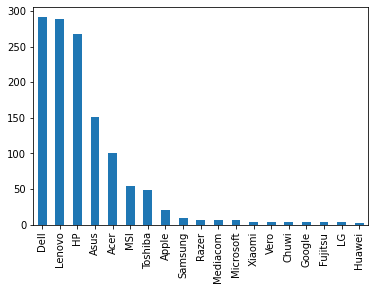

In [17]:
df['Company'].value_counts().plot(kind='bar')

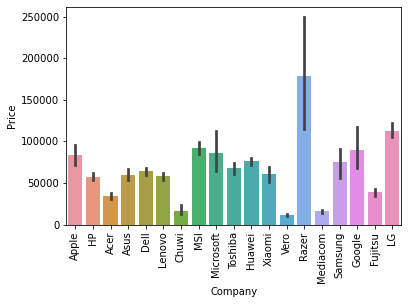

In [18]:
sns.barplot(x=df['Company'],y=df['Price'])
plt.xticks(rotation="vertical")
plt.show()

In [19]:
df["TypeName"].value_counts()

Notebook              706
Gaming                205
Ultrabook             194
2 in 1 Convertible    117
Workstation            29
Netbook                23
Name: TypeName, dtype: int64

### Finding the avg Price w.r.t to TimeName

In [20]:
df.groupby("TypeName")["Price"].mean().sort_values(ascending=False)

TypeName
Workstation           121497.525683
Gaming                 92247.960187
Ultrabook              82939.698928
2 in 1 Convertible     68715.990154
Notebook               42055.998976
Netbook                35877.825391
Name: Price, dtype: float64

##### from this we can interprete that there is no major cahnge in notebook and net book if we see there avg price and if we make them a single category it will not impact as they are a same category but for assurance we will check  the mean after making them a same category

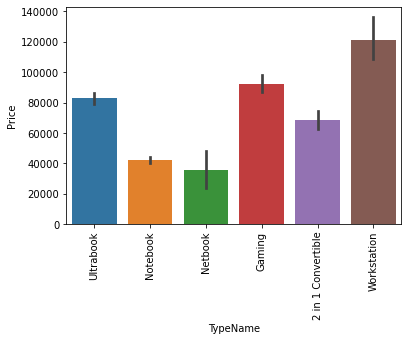

In [21]:
sns.barplot(x=df['TypeName'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [22]:
df.groupby("TypeName")["Price"].agg(["min","max","mean"])

,min,max,mean
TypeName,,,
2 in 1 Convertible,14652.00,150462.72,68715.990154
Gaming,37242.72,324954.72,92247.960187
Netbook,9270.72,101658.24,35877.825391
Notebook,10442.88,261018.72,42055.998976
Ultrabook,26586.72,165168.00,82939.698928
Workstation,72940.32,233845.92,121497.525683


### Treating TypeName Column

In [23]:
df["TypeName"]=df["TypeName"].replace("Netbook","Notebook")

In [24]:
df["TypeName"].value_counts()

Notebook              729
Gaming                205
Ultrabook             194
2 in 1 Convertible    117
Workstation            29
Name: TypeName, dtype: int64

In [25]:
df.groupby("TypeName")["Price"].agg(["min","max","mean"])

,min,max,mean
TypeName,,,
2 in 1 Convertible,14652.00,150462.72,68715.990154
Gaming,37242.72,324954.72,92247.960187
Notebook,9270.72,261018.72,41861.077175
Ultrabook,26586.72,165168.00,82939.698928
Workstation,72940.32,233845.92,121497.525683


<br>before treating netbook notebook avg is <b>42055.998976</b> and after treating the notebook avg is <b>41861.077175</b></br>
<br><b>we can see that it doesn't created a major impact on notebook here we confirm our hypothesis which we assumed beforhand</b></br>

#### Eda for Type column

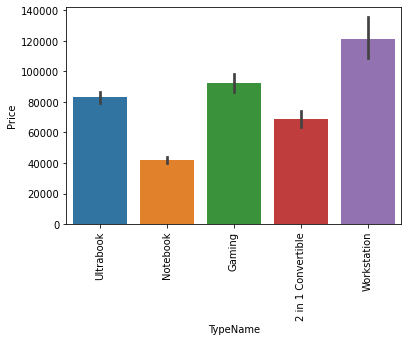

In [26]:
sns.barplot(x=df['TypeName'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [27]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [28]:
df["Inches"].dtype

dtype('float64')

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Inches', ylabel='Density'>

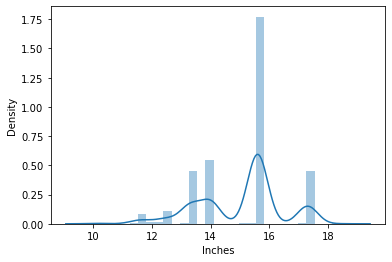

In [29]:
sns.distplot(df["Inches"])

In [30]:
df["ScreenResolution"].value_counts()

Full HD 1920x1080                                505
1366x768                                         262
IPS Panel Full HD 1920x1080                      226
IPS Panel Full HD / Touchscreen 1920x1080         51
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440                    5
IPS Panel Quad HD+ / Touchscreen 3200x1800    

#### From Screen Resolution we can feature engineer columns like Touchscreen,IPS,ppi-pixels_per_inch,height,width

##### Extracted dimensions and created a new column Screen_Res

In [31]:
k=[]
j=[]
for i in df["ScreenResolution"]:
    k.append(i[-10:])
    #print(i[-10:])
    
for i in k:
    a=i.split()
    if len(a)==2:
        j.append(a[1])
    else:
        j.append(a[0])

In [32]:
df["ScreenResolution"].shape

(1274,)

In [33]:
len(j)

1274

In [34]:
df["Screen_Res"]=j

In [35]:
df["Screen_Res"].value_counts()

1920x1080    833
1366x768     289
3840x2160     43
3200x1800     25
2560x1440     23
1600x900      23
2560x1600      6
2304x1440      6
2256x1504      6
1920x1200      5
1440x900       4
2880x1800      4
2400x1600      4
2160x1440      2
2736x1824      1
Name: Screen_Res, dtype: int64

###### Created new columns Screen_width , Screen_height , ppi

In [36]:
width=[]
height=[]
for i in df["Screen_Res"]:
    a=i.split("x")
    width.append(int(a[0]))
    height.append(int(a[1]))

In [37]:
df["Screen_width"]=width
df["Screen_height"]=height

In [38]:
df['ppi'] = (((df['Screen_width']**2) + (df['Screen_height']**2))**0.5/df['Inches']).astype('float')

In [39]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Screen_Res,Screen_width,Screen_height,ppi
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,2560x1600,2560,1600,226.983005
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,1440x900,1440,900,127.677940
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,1920x1080,1920,1080,141.211998
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,2880x1800,2880,1800,220.534624
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,2560x1600,2560,1600,226.983005


#### Creating columns Touchscreen And IPS

In [40]:
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

In [41]:
df['IPS'] = df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

In [42]:
df.iloc[18:20]

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Screen_Res,Screen_width,Screen_height,ppi,Touchscreen,IPS
18,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i3 7100U 2.4GHz,8GB,1TB HDD,Nvidia GeForce 940MX,No OS,2.2kg,26586.72,1920x1080,1920,1080,141.211998,0,0
19,Dell,Ultrabook,13.3,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,128GB SSD,Intel UHD Graphics 620,Windows 10,1.22kg,52161.12,1920x1080,1920,1080,165.632118,1,1


#### At 19 index you can see our Dell ultrabook is both touchscreen and IPS our code is working fine

In [43]:
df.groupby("Company")["ppi"].describe()

,count,mean,std,min,25%,50%,75%,max
Company,,,,,,,,
Acer,101.0,126.638825,22.673645,100.454670,100.454670,135.094211,141.211998,189.905791
Apple,21.0,202.301704,41.991245,127.677940,220.534624,226.415547,226.983005,226.983005
Asus,151.0,137.583440,32.828346,90.583402,127.335675,135.094211,141.211998,282.423996
Chuwi,3.0,183.254144,72.819133,141.211998,141.211998,141.211998,204.275217,267.338436
Dell,291.0,152.856737,51.520064,100.454670,127.335675,141.211998,157.350512,331.264236
Fujitsu,3.0,100.454670,0.000000,100.454670,100.454670,100.454670,100.454670,100.454670
Google,3.0,234.507400,0.000000,234.507400,234.507400,234.507400,234.507400,234.507400
HP,268.0,143.847152,42.946063,100.454670,125.367428,141.211998,157.350512,352.465147
Huawei,2.0,199.692071,0.000000,199.692071,199.692071,199.692071,199.692071,199.692071


#### EDA of Screen Resolution Columns

In [44]:
df.groupby("Touchscreen")["Price"].describe()

,count,mean,std,min,25%,50%,75%,max
Touchscreen,,,,,,,,
0,1086.0,57574.306674,35725.723784,9270.72,30887.748,50189.76,73992.600,261018.72
1,188.0,77422.131574,41773.661319,14652.00,45021.600,74538.72,99534.366,324954.72


<b> 0 represents not TouchScreen and 1 represents it is TouchScreen</b>

<AxesSubplot:xlabel='Touchscreen', ylabel='Price'>

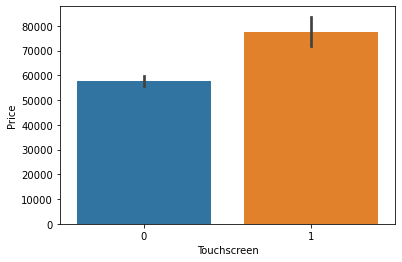

In [45]:
sns.barplot(x=df["Touchscreen"],y=df["Price"])

In [46]:
df.groupby("IPS")["Price"].describe()

,count,mean,std,min,25%,50%,75%,max
IPS,,,,,,,,
0,917.0,54673.631074,35154.472226,9270.72,28238.40,46300.8528,71847.0144,324954.72
1,357.0,75477.137506,38622.076988,13586.40,47898.72,67260.6720,95850.7200,261018.72


<AxesSubplot:xlabel='IPS', ylabel='Price'>

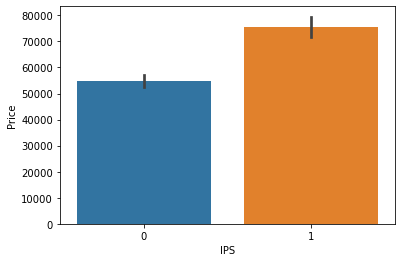

In [47]:
sns.barplot(x=df["IPS"],y=df["Price"])

<AxesSubplot:xlabel='IPS', ylabel='Price'>

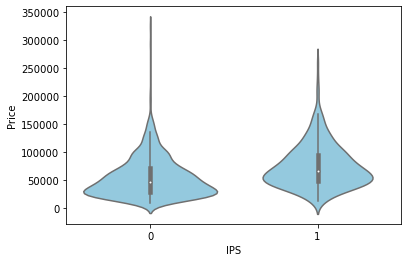

In [48]:
sns.violinplot(x=df["IPS"],y=df["Price"],color="skyblue")

In [49]:
df.drop(["Inches","ScreenResolution","Screen_Res","Screen_width","Screen_height"],inplace=True,axis=1)

In [50]:
df.corr()["Price"]

Price          1.000000
ppi            0.469539
Touchscreen    0.188631
IPS            0.250358
Name: Price, dtype: float64

In [51]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,ppi,Touchscreen,IPS
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,226.983005,0,1
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,127.677940,0,0
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,141.211998,0,0
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,220.534624,0,1
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,226.983005,0,1


In [52]:
df["Cpu"].value_counts()

Intel Core i5 7200U 2.5GHz     190
Intel Core i7 7700HQ 2.8GHz    146
Intel Core i7 7500U 2.7GHz     132
Intel Core i7 8550U 1.8GHz      73
Intel Core i5 8250U 1.6GHz      72
                              ... 
Intel Core M M3-6Y30 0.9GHz      1
AMD A9-Series 9420 2.9GHz        1
Intel Core i5 2.9GHz             1
AMD A6-Series 7310 2GHz          1
AMD A9-Series 9410 2.9GHz        1
Name: Cpu, Length: 118, dtype: int64

##### Doing Feature enginnering on Cpu

In [53]:
k=[]
for i in df["Cpu"]:
    k.append(" ".join(i.split()[:3]))

In [54]:
k

['Intel Core i5',
 'Intel Core i5',
 'Intel Core i5',
 'Intel Core i7',
 'Intel Core i5',
 'AMD A9-Series 9420',
 'Intel Core i7',
 'Intel Core i5',
 'Intel Core i7',
 'Intel Core i5',
 'Intel Core i5',
 'Intel Core i3',
 'Intel Core i7',
 'Intel Core i3',
 'Intel Core M',
 'Intel Core i5',
 'Intel Core i7',
 'Intel Core i7',
 'Intel Core i3',
 'Intel Core i5',
 'Intel Atom x5-Z8350',
 'Intel Core i5',
 'AMD E-Series E2-9000e',
 'Intel Core i5',
 'Intel Core i7',
 'Intel Core i3',
 'Intel Core i5',
 'Intel Core i5',
 'Intel Core i7',
 'Intel Core i5',
 'Intel Atom x5-Z8300',
 'AMD E-Series E2-6110',
 'AMD A6-Series 9220',
 'Intel Core i7',
 'Intel Core i5',
 'Intel Celeron Dual',
 'Intel Core i3',
 'Intel Core i5',
 'Intel Core i5',
 'Intel Core i5',
 'Intel Core i3',
 'Intel Core i7',
 'Intel Core i5',
 'Intel Core i5',
 'Intel Core i5',
 'Intel Core i5',
 'Intel Core i3',
 'AMD Ryzen 1700',
 'Intel Core i5',
 'Intel Pentium Quad',
 'Intel Atom x5-Z8550',
 'Intel Core i7',
 'AMD A6-Se

In [55]:
df["Cpu_Name"]=k

In [56]:
df["Cpu_Name"].value_counts()

Intel Core i7               515
Intel Core i5               423
Intel Core i3               134
Intel Celeron Dual           69
Intel Pentium Quad           27
Intel Core M                 17
AMD A9-Series 9420           12
AMD A6-Series 9220            8
Intel Celeron Quad            8
AMD A12-Series 9720P          7
Intel Atom x5-Z8350           5
Intel Atom x5-Z8550           4
AMD A8-Series 7410            4
Intel Pentium Dual            3
AMD Ryzen 1700                3
Intel Atom X5-Z8350           2
Intel Xeon E3-1535M           2
AMD A9-Series A9-9420         2
AMD E-Series 7110             2
AMD A10-Series 9620P          2
AMD A10-Series 9600P          2
AMD A6-Series A6-9220         2
Intel Xeon E3-1505M           2
AMD E-Series E2-9000e         2
AMD A10-Series A10-9620P      2
Intel Atom x5-Z8300           1
AMD E-Series 9000             1
Samsung Cortex A72&A53        1
AMD FX 8800P                  1
AMD A4-Series 7210            1
AMD A12-Series 9700P          1
AMD A6-S

In [57]:
def Processor(text):
    if text=="Intel Core i7" or text=="Intel Core i5" or text=="Intel Core i3":
        return text
    else:
        if text.split()[0]=="Intel":
            return "Other Intel Proceesor"
        else:
            return "AMD Processor"

In [58]:
df["CPU_Brand_Type"]=df["Cpu_Name"].apply(Processor)

In [59]:
df["CPU_Brand_Type"].value_counts()

Intel Core i7            515
Intel Core i5            423
Other Intel Proceesor    141
Intel Core i3            134
AMD Processor             61
Name: CPU_Brand_Type, dtype: int64

In [60]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,ppi,Touchscreen,IPS,Cpu_Name,CPU_Brand_Type
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,226.983005,0,1,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,127.677940,0,0,Intel Core i5,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,141.211998,0,0,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,220.534624,0,1,Intel Core i7,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,226.983005,0,1,Intel Core i5,Intel Core i5


In [61]:
df.groupby("CPU_Brand_Type")["Price"].describe()

,count,mean,std,min,25%,50%,75%,max
CPU_Brand_Type,,,,,,,,
AMD Processor,61.0,29975.354203,18522.365353,10602.720,21205.440,24988.32,30849.12,117162.7200
Intel Core i3,134.0,28923.537063,7643.362118,18061.920,23842.800,26586.72,33513.12,62176.1616
Intel Core i5,423.0,54080.012426,20012.979664,20986.992,38838.456,50882.40,63882.72,124142.4000
Intel Core i7,515.0,85902.151149,37406.831311,30849.120,58554.720,79014.24,105228.00,324954.7200
Other Intel Proceesor,141.0,30222.369600,36666.151837,9270.720,15238.080,18594.72,25521.12,261018.7200


#### EDA on Cpu

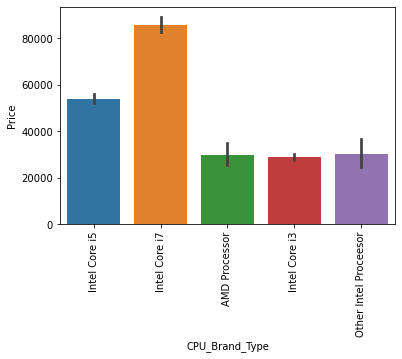

In [62]:
sns.barplot(x=df["CPU_Brand_Type"],y=df["Price"])
plt.xticks(rotation="vertical")
plt.show()

In [63]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,ppi,Touchscreen,IPS,Cpu_Name,CPU_Brand_Type
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,226.983005,0,1,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,127.677940,0,0,Intel Core i5,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,141.211998,0,0,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,220.534624,0,1,Intel Core i7,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,226.983005,0,1,Intel Core i5,Intel Core i5


In [64]:
df.drop(["Cpu","Cpu_Name"],inplace=True,axis=1)

In [65]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,ppi,Touchscreen,IPS,CPU_Brand_Type
0,Apple,Ultrabook,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,226.983005,0,1,Intel Core i5
1,Apple,Ultrabook,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,127.677940,0,0,Intel Core i5
2,HP,Notebook,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,141.211998,0,0,Intel Core i5
3,Apple,Ultrabook,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,220.534624,0,1,Intel Core i7
4,Apple,Ultrabook,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,226.983005,0,1,Intel Core i5


### Treating Ram

In [66]:
df["Ram"].value_counts()

8GB     613
4GB     366
16GB    198
6GB      35
12GB     25
32GB     17
2GB      16
24GB      3
64GB      1
Name: Ram, dtype: int64

In [67]:
df["Ram"]=[int(i.split("GB")[0]) for i in df["Ram"]]

In [68]:
df["Ram"].value_counts()

8     613
4     366
16    198
6      35
12     25
32     17
2      16
24      3
64      1
Name: Ram, dtype: int64

In [69]:
df["Ram"].dtype

dtype('int64')

#### EDA of Ram

<AxesSubplot:xlabel='Ram', ylabel='Price'>

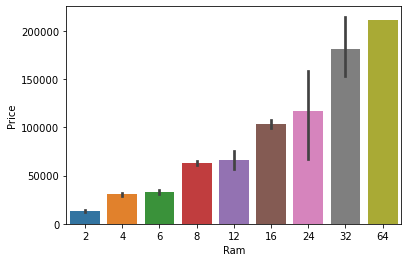

In [70]:
sns.barplot(x=df["Ram"],y=df["Price"])

In [71]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,ppi,Touchscreen,IPS,CPU_Brand_Type
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,226.983005,0,1,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,127.677940,0,0,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,141.211998,0,0,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,220.534624,0,1,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,226.983005,0,1,Intel Core i5


In [72]:
df["Memory"].value_counts()

256GB SSD                        412
1TB HDD                          215
500GB HDD                        123
512GB SSD                        114
128GB SSD +  1TB HDD              94
128GB SSD                         74
256GB SSD +  1TB HDD              73
32GB Flash Storage                36
2TB HDD                           16
512GB SSD +  1TB HDD              14
1TB SSD                           14
64GB Flash Storage                13
256GB SSD +  2TB HDD              10
256GB Flash Storage                8
16GB Flash Storage                 7
1.0TB Hybrid                       7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

In [73]:
# ssd_1=[]
# ssd_2=[]
# for i in df["Memory"]:
#     if "+" in i:
#             for j in i.split("+")[1]:
#                 if "SSD" in j:
#                     ssd_2.append(j)
#                 else:
#                     ssd_2.append(0)
#     else:
#         if "SSD" in i[:9]:
#             ssd_1.append(i.split("SSD")[0])
#         else:
#             ssd_1.append(0)

In [74]:
df.shape

(1274, 12)

In [75]:
# len(ssd_1)

In [76]:
# len(ssd_2)

In [77]:
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
df["Memory"] = df["Memory"].str.replace('GB', '')
df["Memory"] = df["Memory"].str.replace('TB', '000')
new = df["Memory"].str.split("+", n = 1, expand = True)

df["first"]= new[0]
df["first"]=df["first"].str.strip()

df["second"]= new[1]

df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['first'] = df['first'].str.replace(r'\D', '')

df["second"].fillna("0", inplace = True)

df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['second'] = df['second'].str.replace(r'\D', '')

df["first"] = df["first"].astype(int)
df["second"] = df["second"].astype(int)

df["HDD"]=(df["first"]*df["Layer1HDD"]+df["second"]*df["Layer2HDD"])
df["SSD"]=(df["first"]*df["Layer1SSD"]+df["second"]*df["Layer2SSD"])
df["Hybrid"]=(df["first"]*df["Layer1Hybrid"]+df["second"]*df["Layer2Hybrid"])
df["Flash_Storage"]=(df["first"]*df["Layer1Flash_Storage"]+df["second"]*df["Layer2Flash_Storage"])

df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3028\4023190604.py:16: FutureWarning: The default value of regex will change from True to False in a future version.
  df['first'] = df['first'].str.replace(r'\D', '')
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3028\4023190604.py:25: FutureWarning: The default value of regex will change from True to False in a future version.
  df['second'] = df['second'].str.replace(r'\D', '')


In [78]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,ppi,Touchscreen,IPS,CPU_Brand_Type,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,226.983005,0,1,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,127.677940,0,0,Intel Core i5,0,0,0,128
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,141.211998,0,0,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,220.534624,0,1,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,226.983005,0,1,Intel Core i5,0,256,0,0


In [79]:
df.drop(columns=['Memory'],inplace=True)

In [80]:
df.corr()["Price"]

Ram              0.740106
Price            1.000000
ppi              0.469539
Touchscreen      0.188631
IPS              0.250358
HDD             -0.098011
SSD              0.669957
Hybrid           0.022533
Flash_Storage   -0.037176
Name: Price, dtype: float64

In [81]:
df.groupby("Hybrid")["Price"].describe()

,count,mean,std,min,25%,50%,75%,max
Hybrid,,,,,,,,
0,1264.0,60433.981473,37247.182637,9270.7200,32367.60,52693.92,79813.44,324954.72
508,1.0,53386.560000,NaN,53386.5600,53386.56,53386.56,53386.56,53386.56
1000,9.0,71013.182400,51224.297819,29303.4672,43956.00,47898.72,58554.72,172627.20


In [82]:
df.groupby("Flash_Storage")["Price"].describe()

,count,mean,std,min,25%,50%,75%,max
Flash_Storage,,,,,,,,
0,1203.0,62360.273009,37121.246989,9270.720,34632.000,53839.9728,79893.3600,324954.7200
16,7.0,18121.289143,3558.697768,14332.320,15528.456,17316.0000,19820.1600,24503.4720
32,36.0,16761.074000,5935.604857,10224.432,13266.720,15397.9200,18594.7200,35111.5200
64,14.0,30712.723200,25422.971163,12201.120,14199.120,24721.9200,33137.6292,106187.0400
128,4.0,37721.440800,18659.390391,18594.720,24029.280,36868.1616,50560.3224,58554.7200
256,8.0,77540.182200,25870.535728,51095.520,59595.012,65614.3200,102217.6800,114017.6016
512,2.0,65108.160000,4294.910020,62071.200,63589.680,65108.1600,66626.6400,68145.1200


#### Dropping these because major are 0 so we dropped it 

In [83]:
df.drop(columns=['Hybrid','Flash_Storage'],inplace=True)

In [84]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,ppi,Touchscreen,IPS,CPU_Brand_Type,HDD,SSD
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,226.983005,0,1,Intel Core i5,0,128
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,127.677940,0,0,Intel Core i5,0,0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86kg,30636.0000,141.211998,0,0,Intel Core i5,0,256
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,220.534624,0,1,Intel Core i7,0,512
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,226.983005,0,1,Intel Core i5,0,256


In [85]:
df["Gpu"].value_counts()

Intel HD Graphics 620      279
Intel HD Graphics 520      181
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: Gpu, Length: 110, dtype: int64

In [86]:
df["Gpu_brand"]=[i.split()[0] for i in df["Gpu"]]

In [87]:
df["Gpu_brand"].value_counts()

Intel     703
Nvidia    396
AMD       174
ARM         1
Name: Gpu_brand, dtype: int64

#### Dropping because only one record

In [88]:
df=df[df["Gpu_brand"]!="ARM"]

In [89]:
df.shape

(1273, 14)

### EDA for Gpu

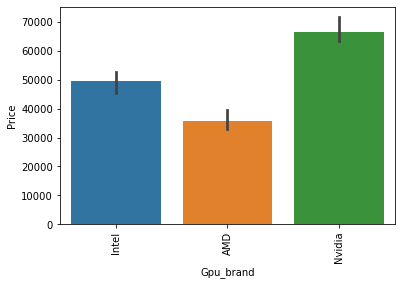

In [90]:
sns.barplot(x=df['Gpu_brand'],y=df['Price'],estimator=np.median)
plt.xticks(rotation='vertical')
plt.show()

In [91]:
df.drop(columns=['Gpu'],inplace=True)

In [92]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,ppi,Touchscreen,IPS,CPU_Brand_Type,HDD,SSD,Gpu_brand
0,Apple,Ultrabook,8,macOS,1.37kg,71378.6832,226.983005,0,1,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,macOS,1.34kg,47895.5232,127.677940,0,0,Intel Core i5,0,0,Intel
2,HP,Notebook,8,No OS,1.86kg,30636.0000,141.211998,0,0,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,macOS,1.83kg,135195.3360,220.534624,0,1,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,macOS,1.37kg,96095.8080,226.983005,0,1,Intel Core i5,0,256,Intel


In [93]:
df["OpSys"].value_counts()

Windows 10      1047
No OS             66
Linux             58
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

In [94]:
di={"Windows 10":"Windows","Windows 7":"Windows","Windows 10 S":"Windows","Mac OS X":"Mac","macOS":"Mac","Chrome OS":"Other/Linux/No Os",
    "Android":"Other/Linux/No Os","Linux":"Other/Linux/No","No OS": "Other/Linux/No Os"}

In [95]:
df["OpSys"]=df["OpSys"].replace(di)

In [96]:
df["OpSys"].value_counts()

Windows              1100
Other/Linux/No Os      94
Other/Linux/No         58
Mac                    21
Name: OpSys, dtype: int64

In [97]:
# df["OpSys"]=df["OpSys"].replace("Windows 10","Windows")
# df["OpSys"]=df["OpSys"].replace("Windows 7","Windows")
# df["OpSys"]=df["OpSys"].replace("Windows 10 S","Windows")
# df["OpSys"]=df["OpSys"].replace("Mac OS X","Mac")
# df["OpSys"]=df["OpSys"].replace("macOS","Mac")
# df["OpSys"]=df["OpSys"].replace("Chrome OS","Other/Linux/No Os")
# df["OpSys"]=df["OpSys"].replace("Android","Other/Linux/No Os")
# df["OpSys"]=df["OpSys"].replace("Linux","Other/Linux/No Os")
# df["OpSys"]=df["OpSys"].replace("No OS","Other/Linux/No Os")

In [98]:
df.groupby("OpSys")["Price"].describe()

,count,mean,std,min,25%,50%,75%,max
OpSys,,,,,,,,
Mac,21.0,83340.499886,29923.305164,47895.5232,61964.6400,71378.6832,104370.1920,152274.24
Other/Linux/No,58.0,33133.077434,13404.553917,11934.7200,21991.3200,30862.9728,44541.9468,58554.72
Other/Linux/No Os,94.0,30586.143523,18173.581879,9270.7200,18594.7200,25467.5736,34712.3196,117162.72
Windows,1100.0,64089.981622,37700.897280,10224.4320,36493.7364,56849.7600,84195.7200,324954.72


### EDA for Operating System

<AxesSubplot:xlabel='OpSys', ylabel='Price'>

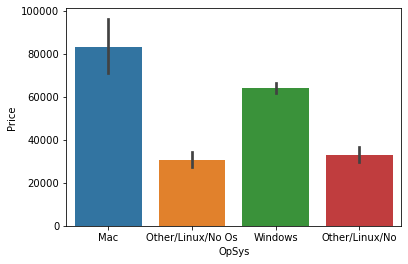

In [99]:
sns.barplot(x=df["OpSys"],y=df["Price"])

In [100]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,ppi,Touchscreen,IPS,CPU_Brand_Type,HDD,SSD,Gpu_brand
0,Apple,Ultrabook,8,Mac,1.37kg,71378.6832,226.983005,0,1,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Mac,1.34kg,47895.5232,127.677940,0,0,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Other/Linux/No Os,1.86kg,30636.0000,141.211998,0,0,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,Mac,1.83kg,135195.3360,220.534624,0,1,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,Mac,1.37kg,96095.8080,226.983005,0,1,Intel Core i5,0,256,Intel


In [101]:
df["Weight"]=[float(i.split("kg")[0]) for i in df["Weight"]]

In [102]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,ppi,Touchscreen,IPS,CPU_Brand_Type,HDD,SSD,Gpu_brand
0,Apple,Ultrabook,8,Mac,1.37,71378.6832,226.983005,0,1,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Mac,1.34,47895.5232,127.677940,0,0,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Other/Linux/No Os,1.86,30636.0000,141.211998,0,0,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,Mac,1.83,135195.3360,220.534624,0,1,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,Mac,1.37,96095.8080,226.983005,0,1,Intel Core i5,0,256,Intel


In [103]:
df.dtypes

Company            object
TypeName           object
Ram                 int64
OpSys              object
Weight            float64
Price             float64
ppi               float64
Touchscreen         int64
IPS                 int64
CPU_Brand_Type     object
HDD                 int64
SSD                 int64
Gpu_brand          object
dtype: object

In [104]:
num_cols = df.dtypes[df.dtypes!='object'].index
cat_cols = df.dtypes[df.dtypes=='object'].index

In [105]:
print(num_cols)
print(cat_cols)

Index(['Ram', 'Weight', 'Price', 'ppi', 'Touchscreen', 'IPS', 'HDD', 'SSD'], dtype='object')
Index(['Company', 'TypeName', 'OpSys', 'CPU_Brand_Type', 'Gpu_brand'], dtype='object')


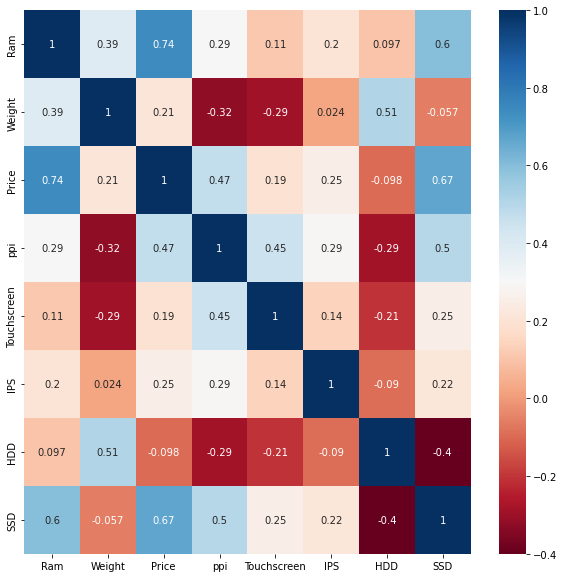

In [106]:
corr = df[num_cols].corr()

plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True,cmap='RdBu')
plt.show()

### Outlier Treatment

In [107]:
a=df.describe(percentiles=[0.01,0.02,0.03,0.04,0.05,0.96,0.97,0.98,0.99])
a.iloc[3:].T

,min,1%,2%,3%,4%,5%,50%,96%,97%,98%,99%,max
Ram,2.000000,2.000000,4.00000,4.00000,4.00000,4.00000,8.000000,16.00000,16.00000,16.000000,32.000000,64.000000
Weight,0.690000,0.956000,1.08000,1.10000,1.13000,1.17000,2.040000,3.35600,3.78000,4.300000,4.420000,4.700000
Price,9270.720000,12963.705984,14119.20000,15254.27712,15930.72000,17219.88288,52693.920000,136535.32800,145256.19840,153333.297216,167853.312000,324954.720000
ppi,90.583402,100.454670,100.45467,100.45467,100.45467,100.45467,141.211998,276.05353,276.05353,282.423996,292.095494,352.465147
Touchscreen,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000,0.000000,1.00000,1.00000,1.000000,1.000000,1.000000
IPS,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000,0.000000,1.00000,1.00000,1.000000,1.000000,1.000000
HDD,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000,0.000000,1000.00000,1000.00000,2000.000000,2000.000000,2000.000000
SSD,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000,256.000000,512.00000,512.00000,512.000000,1000.000000,1024.000000


#### Clipping they Extreme Outliers

In [108]:
df["Price"]=np.where(df['Price']>167853.312000,167853.312000,df['Price'])
df["ppi"]=np.where(df['ppi']>292.095494,292.095494,df['ppi'])
df["Ram"]=np.where(df['Ram']>32.000000,32.000000,df['Ram'])

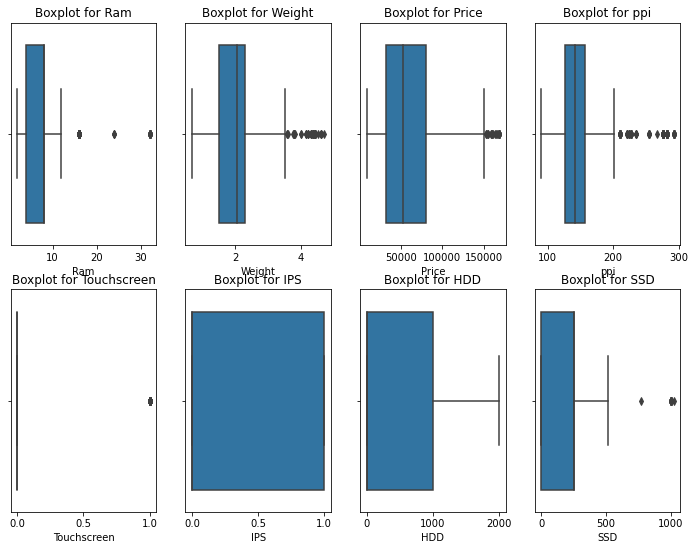

In [109]:

plt.figure(figsize=(12,9))
for i in range(len(num_cols)):
    plt.subplot(2,4,i+1)
    sns.boxplot(x=df[num_cols[i]])
    plt.title(f'Boxplot for {num_cols[i]}')
    
plt.show()

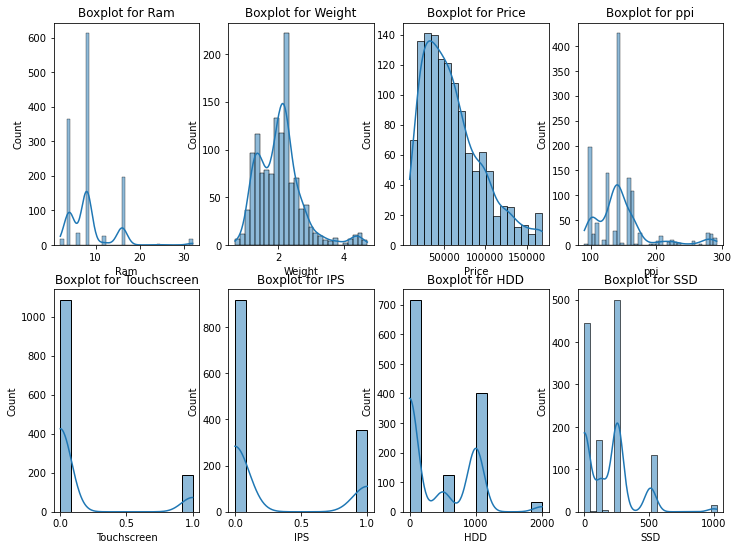

In [110]:

plt.figure(figsize=(12,9))
for i in range(len(num_cols)):
    plt.subplot(2,4,i+1)
    sns.histplot(x=df[num_cols[i]],kde=True)
    plt.title(f'Boxplot for {num_cols[i]}')
    
plt.show()

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

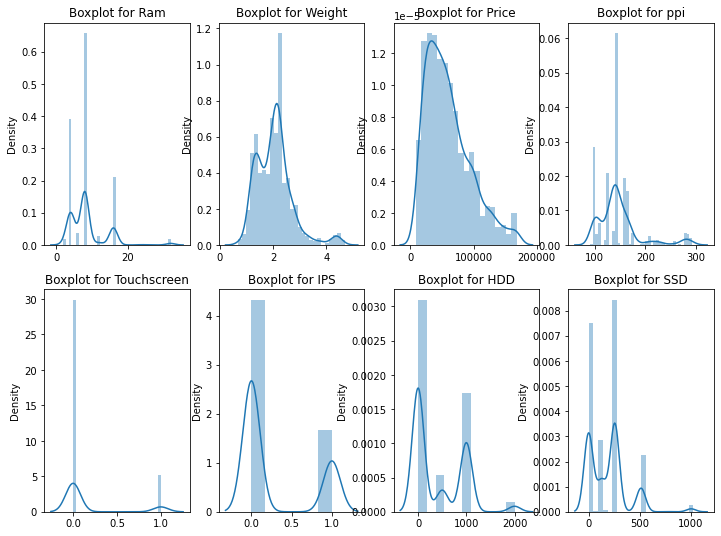

In [111]:

plt.figure(figsize=(12,9))
for i in range(len(num_cols)):
    plt.subplot(2,4,i+1)
    sns.distplot(x=df[num_cols[i]],kde=True)
    plt.title(f'Boxplot for {num_cols[i]}')
    
plt.show()

## Encoding

In [112]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,ppi,Touchscreen,IPS,CPU_Brand_Type,HDD,SSD,Gpu_brand
0,Apple,Ultrabook,8.0,Mac,1.37,71378.6832,226.983005,0,1,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8.0,Mac,1.34,47895.5232,127.677940,0,0,Intel Core i5,0,0,Intel
2,HP,Notebook,8.0,Other/Linux/No Os,1.86,30636.0000,141.211998,0,0,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16.0,Mac,1.83,135195.3360,220.534624,0,1,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8.0,Mac,1.37,96095.8080,226.983005,0,1,Intel Core i5,0,256,Intel


In [113]:
dum_cat_cols = df.dtypes[df.dtypes=='object'].index
print(dum_cat_cols)

Index(['Company', 'TypeName', 'OpSys', 'CPU_Brand_Type', 'Gpu_brand'], dtype='object')


In [114]:
df_dum=pd.get_dummies(data=df,columns=dum_cat_cols,drop_first=True,dtype=int)
print(df_dum.shape)

(1273, 39)


In [115]:
df_dum.head()

,Ram,Weight,Price,ppi,Touchscreen,IPS,HDD,SSD,Company_Apple,Company_Asus,...,TypeName_Workstation,OpSys_Other/Linux/No,OpSys_Other/Linux/No Os,OpSys_Windows,CPU_Brand_Type_Intel Core i3,CPU_Brand_Type_Intel Core i5,CPU_Brand_Type_Intel Core i7,CPU_Brand_Type_Other Intel Proceesor,Gpu_brand_Intel,Gpu_brand_Nvidia
0,8.0,1.37,71378.6832,226.983005,0,1,0,128,1,0,...,0,0,0,0,0,1,0,0,1,0
1,8.0,1.34,47895.5232,127.677940,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
2,8.0,1.86,30636.0000,141.211998,0,0,0,256,0,0,...,0,0,1,0,0,1,0,0,1,0
3,16.0,1.83,135195.3360,220.534624,0,1,0,512,1,0,...,0,0,0,0,0,0,1,0,0,0
4,8.0,1.37,96095.8080,226.983005,0,1,0,256,1,0,...,0,0,0,0,0,1,0,0,1,0


### Select independent(x) and Target variable(y)

In [116]:
x=df_dum.drop("Price",axis=1)
print(x.shape)

(1273, 38)


In [117]:
y=df_dum["Price"]

### Finding the Target Variable is normally distributed or not

In [118]:
from scipy.stats import shapiro,jarque_bera
from scipy.stats import boxcox

In [119]:
df_dum.shape


(1273, 39)

#### no. of rows is less than 5000 so we will use shapiro

In [120]:
test_stat,p=shapiro(y)
print(p)
if p > 0.05:
    print("Target Variable is Normally Distributed")
else:
    print("Target Variable is Not Normally Distributed")

1.1016859651615065e-24
Target Variable is Not Normally Distributed


<function matplotlib.pyplot.show(close=None, block=None)>

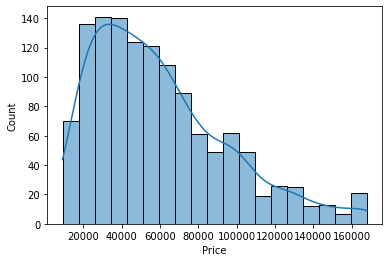

In [121]:
sns.histplot((y),kde=True)
plt.show

In [122]:
test_stat,p=shapiro(np.log(y))
print(p)
if p > 0.05:
    print("Target Variable is Normally Distributed")
else:
    print("Target Variable is Not Normally Distributed")

4.328016611765406e-09
Target Variable is Not Normally Distributed


<function matplotlib.pyplot.show(close=None, block=None)>

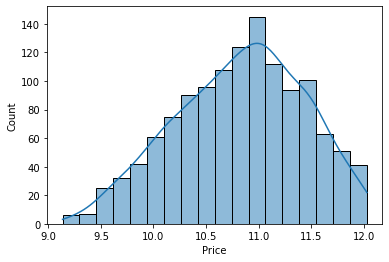

In [123]:
sns.histplot(np.log(y),kde=True)
plt.show

In [124]:
test_stat,p=shapiro(1/np.log(y))
print(test_stat)
print(p)
if p > 0.05:
    print("Target Variable is Normally Distributed")
else:
    print("Target Variable is Not Normally Distributed")

0.9761770963668823
1.1887496195739367e-13
Target Variable is Not Normally Distributed


<function matplotlib.pyplot.show(close=None, block=None)>

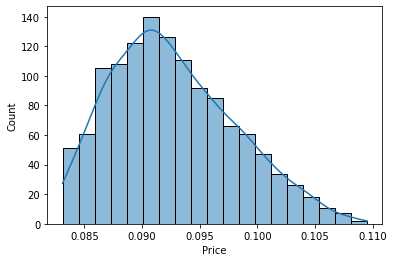

In [125]:
sns.histplot(1/np.log(y),kde=True)
plt.show

In [126]:
y1,i=boxcox(y)
test_stat,p=shapiro(y1)
print(p)
if p > 0.05:
    print("Target Variable is Normally Distributed")
else:
    print("Target Variable is Not Normally Distributed")

3.339450245221087e-07
Target Variable is Not Normally Distributed


<function matplotlib.pyplot.show(close=None, block=None)>

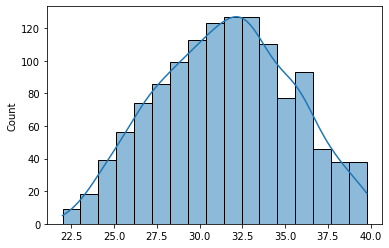

In [127]:
sns.histplot(y1,kde=True)
plt.show

## using target variable boxcox(y)

In [128]:
transformed_y,lambda_val=boxcox(y)

In [129]:
# Assuming model_predictions is your model's predictions
original_predictions = (transformed_y * lambda_val + 1) ** (1 / lambda_val)

In [130]:
x.head()

,Ram,Weight,ppi,Touchscreen,IPS,HDD,SSD,Company_Apple,Company_Asus,Company_Chuwi,...,TypeName_Workstation,OpSys_Other/Linux/No,OpSys_Other/Linux/No Os,OpSys_Windows,CPU_Brand_Type_Intel Core i3,CPU_Brand_Type_Intel Core i5,CPU_Brand_Type_Intel Core i7,CPU_Brand_Type_Other Intel Proceesor,Gpu_brand_Intel,Gpu_brand_Nvidia
0,8.0,1.37,226.983005,0,1,0,128,1,0,0,...,0,0,0,0,0,1,0,0,1,0
1,8.0,1.34,127.677940,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
2,8.0,1.86,141.211998,0,0,0,256,0,0,0,...,0,0,1,0,0,1,0,0,1,0
3,16.0,1.83,220.534624,0,1,0,512,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,8.0,1.37,226.983005,0,1,0,256,1,0,0,...,0,0,0,0,0,1,0,0,1,0


In [131]:
y2=transformed_y.copy()
x1=x.copy()

In [132]:
df_dum.shape

(1273, 39)

In [133]:
len(y2)

1273

In [134]:
import statsmodels.api as sm

In [135]:
x1=sm.add_constant(x1)
ols_m1=sm.OLS(y2,x1).fit()
ols_m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     159.5
Date:                Mon, 15 Apr 2024   Prob (F-statistic):               0.00
Time:                        18:50:27   Log-Likelihood:                -2411.5
No. Observations:                1273   AIC:                             4899.
Df Residuals:                    1235   BIC:                             5095.
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   18.7992      0.393     47.886      0.000      18.029      19.569
Ram                                      0.1872      0.016     11.348      0.000       0.155       0.220
Weight                                   0.4604      0.125      3.678      0.000       0.215       0.706
ppi                                      0.0163      0.002      9.974      0.000       0.013       0.020
Touchscreen                             -0.6717      0.242     -2.781      0.006      -1.146      -0.198
IPS                                      0.2216      0.123      1.800      0.072      -0.020       0.463
HDD                                  -4.325e-05      0.000     -0.340      0.734      -0.000       0.000
SSD                                      0.0035      0.000      8.306      0.000       0.003       0.004
Company_Apple                            6.7266      0.353     19.046      0.000       6.034       7.419
Company_Asus                             0.6063      0.223      2.719      0.007       0.169       1.044
Company_Chuwi                           -2.1603      0.974     -2.219      0.027      -4.071      -0.250
Company_Dell                             0.9284      0.208      4.453      0.000       0.519       1.337
Company_Fujitsu                          0.1050      0.965      0.109      0.913      -1.789       1.999
Company_Google                           3.0515      1.010      3.020      0.003       1.069       5.034
Company_HP                               1.2716      0.202      6.295      0.000       0.875       1.668
Company_Huawei                           0.2285      1.180      0.194      0.846      -2.087       2.544
Company_LG                               3.0850      0.987      3.125      0.002       1.148       5.022
Company_Lenovo                           0.7942      0.198      4.009      0.000       0.406       1.183
Company_MSI                              1.5223      0.331      4.605      0.000       0.874       2.171
Company_Mediacom                        -2.0001      0.659     -3.034      0.002      -3.293      -0.707
Company_Microsoft                        2.4823      0.729      3.405      0.001       1.052       3.913
Company_Razer                            0.8261      0.676      1.222      0.222      -0.501       2.153
Company_Samsung                          2.0049      0.618      3.242      0.001       0.792       3.218
Company_Toshiba                          1.9050      0.301      6.320      0.000       1.314       2.496
Company_Vero                            -2.8847      0.848     -3.401      0.001      -4.549      -1.221
Company_Xiaomi                           1.4910      0.862      1.730      0.084      -0.200       3.181
TypeName_Gaming                       

#### from the pvalue we can drop these features which have maximum pvalues to check if they increase the model performance

<br>Company_Fujitsu  0.908</br>
<br>Company_Huawei  0.774</br>
<br>TypeName_Gaming  0.684</br>
<br>TypeName_Ultrabook  0.767</br>

In [136]:
print("OLS Model = 1")
print(ols_m1.rsquared)
print(ols_m1.rsquared_adj)

OLS Model = 1
0.826985841294288
0.8218024211549266


In [137]:
x2=x1.drop(["Company_Fujitsu","Company_Huawei","TypeName_Gaming","TypeName_Ultrabook"],axis=1)

In [138]:
x2=sm.add_constant(x2)
ols_m2=sm.OLS(y2,x2).fit()
ols_m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     179.3
Date:                Mon, 15 Apr 2024   Prob (F-statistic):               0.00
Time:                        18:50:28   Log-Likelihood:                -2411.9
No. Observations:                1273   AIC:                             4892.
Df Residuals:                    1239   BIC:                             5067.
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   18.8872      0.351     53.784      0.000      18.198      19.576
Ram                                      0.1864      0.016     11.395      0.000       0.154       0.218
Weight                                   0.4142      0.112      3.682      0.000       0.194       0.635
ppi                                      0.0164      0.002     10.206      0.000       0.013       0.020
Touchscreen                             -0.6819      0.166     -4.096      0.000      -1.008      -0.355
IPS                                      0.2146      0.122      1.753      0.080      -0.026       0.455
HDD                                  -4.802e-05      0.000     -0.379      0.705      -0.000       0.000
SSD                                      0.0036      0.000      8.432      0.000       0.003       0.004
Company_Apple                            6.7835      0.341     19.887      0.000       6.114       7.453
Company_Asus                             0.5762      0.218      2.644      0.008       0.149       1.004
Company_Chuwi                           -2.1889      0.971     -2.253      0.024      -4.095      -0.283
Company_Dell                             0.9133      0.204      4.487      0.000       0.514       1.313
Company_Google                           3.0901      0.993      3.113      0.002       1.142       5.038
Company_HP                               1.2521      0.197      6.357      0.000       0.866       1.638
Company_LG                               3.1093      0.973      3.194      0.001       1.200       5.019
Company_Lenovo                           0.7753      0.193      4.012      0.000       0.396       1.154
Company_MSI                              1.4270      0.310      4.602      0.000       0.819       2.035
Company_Mediacom                        -2.0418      0.656     -3.111      0.002      -3.329      -0.754
Company_Microsoft                        2.5208      0.703      3.584      0.000       1.141       3.901
Company_Razer                            0.7565      0.663      1.142      0.254      -0.543       2.056
Company_Samsung                          2.0168      0.616      3.276      0.001       0.809       3.224
Company_Toshiba                          1.8874      0.297      6.365      0.000       1.306       2.469
Company_Vero                            -2.9311      0.845     -3.468      0.001      -4.589      -1.273
Company_Xiaomi                           1.5366      0.857      1.792      0.073      -0.145       3.218
TypeName_Notebook                       -1.5472      0.136    -11.350      0.000      -1.815      -1.280
TypeName_Workstation                     2.7081      0.331      8.185      0.000       2.059       3.357
OpSys_Other/Linux/No                  

In [139]:
print("OLS Model = 2")
print(ols_m2.rsquared)
print(ols_m2.rsquared_adj)

OLS Model = 2
0.8268750801393563
0.8222640047919784


#### There is Slightly increase in adjusted_r2 from this we can tell these columns are not explaining a significant variance

In [140]:
from sklearn.model_selection import train_test_split

<br> x1- df_dum </br>
<br> y2- Tranformed_y from boxcox </br>

In [141]:
y2=transformed_y.copy()
x1=x.copy()

In [142]:
x_train,x_test,y_train,y_test=train_test_split(x1,y2,test_size=0.2,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1018, 38)
(255, 38)
(1018,)
(255,)


In [143]:
from sklearn.metrics import *

In [144]:
from scipy.special import boxcox,inv_boxcox

In [145]:
def eval_regression(model,x_train,x_test,y_train,y_test,modelname):
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    y_pred_ori=(y_pred * lambda_val + 1) ** (1 / lambda_val)
    train_r2 = model.score(x_train,y_train)
    test_r2 = model.score(x_test,y_test)
    test_mae = mean_absolute_error(y_test,y_pred)
    test_mse = mean_squared_error(y_test,y_pred)
    test_rmse = np.sqrt(test_mse)
    res = pd.DataFrame({'Train_R2':train_r2,'Test_R2':test_r2,'Test_MAE':test_mae,
                        'Test_MSE':test_mse,'Test_RMSE':test_rmse},index=[modelname])
    return res,y_pred_ori

In [146]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet

In [147]:
lr=LinearRegression()

In [148]:
lr_res,lr_pred=eval_regression(lr,x_train,x_test,y_train,y_test,'Lin_Reg')
lr_res

,Train_R2,Test_R2,Test_MAE,Test_MSE,Test_RMSE
Lin_Reg,0.82867,0.800306,1.360176,3.065788,1.750939


In [150]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [154]:
hparams_dt = {'alpha':[0.01,0.05,0.1,1]}

In [152]:
rr=Ridge()#l2 regularisation technique

In [153]:
rr_res,rr_pred=eval_regression(rr,x_train,x_test,y_train,y_test,'Lin_Reg_Ridge')
rr_res

,Train_R2,Test_R2,Test_MAE,Test_MSE,Test_RMSE
Lin_Reg_Ridge,0.827767,0.808568,1.341396,2.938941,1.714334


In [161]:

gs_rr = GridSearchCV(rr,param_grid=hparams_dt,cv=10)
gs_rr.fit(x_train,y_train)
print(gs_rr.best_score_)
print(gs_rr.best_params_)
print(gs_rr.best_estimator_)

0.814535975934113
{'alpha': 0.1}
Ridge(alpha=0.1)


0.814535975934113
{'alpha': 0.1}
Ridge(alpha=0.1)


In [163]:
lss=Lasso()#l1 Regularization technique
lss_res,lss_pred=eval_regression(lss,x_train,x_test,y_train,y_test,"Lin_Reg_Lasso")
lss_res

,Train_R2,Test_R2,Test_MAE,Test_MSE,Test_RMSE
Lin_Reg_Lasso,0.600446,0.626885,1.946552,5.728219,2.39337


In [165]:

gs_lss = GridSearchCV(lss,param_grid=hparams_dt,cv=10)
gs_lss.fit(x_train,y_train)
print(gs_lss.best_score_)
print(gs_lss.best_params_)
print(gs_lss.best_estimator_)

0.8013048887446941
{'alpha': 0.01}
Lasso(alpha=0.01)


In [166]:
En=ElasticNet()
En_res,En_pred=eval_regression(En,x_train,x_test,y_train,y_test,"Lin_Reg_ElasticNet")
En_res

,Train_R2,Test_R2,Test_MAE,Test_MSE,Test_RMSE
Lin_Reg_ElasticNet,0.603457,0.630955,1.932127,5.665736,2.380281


In [168]:
from sklearn.tree import DecisionTreeRegressor

In [169]:
dt1=DecisionTreeRegressor(criterion='squared_error') 
dt1_res,ypred_dt1 = eval_regression(dt1,x_train,x_test,y_train,y_test,'DT1(No Pruning)')
dt1_res

,Train_R2,Test_R2,Test_MAE,Test_MSE,Test_RMSE
DT1(No Pruning),0.995133,0.819456,1.261557,2.771788,1.664869


In [170]:
dt2 = DecisionTreeRegressor(criterion='squared_error',max_depth=7,min_samples_split=10) 
dt2_res,ypred_dt2 = eval_regression(dt2,x_train,x_test,y_train,y_test,'DT2(with Pruning)')
dt2_res

,Train_R2,Test_R2,Test_MAE,Test_MSE,Test_RMSE
DT2(with Pruning),0.8759,0.813726,1.338157,2.859762,1.691083


In [171]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [172]:
hparams_dt = {'criterion':['squared_error','absolute_error'],
             'max_depth':[4,5,6,7,8],
             'min_samples_split':[8,10,12]}

In [175]:
dt_base = DecisionTreeRegressor()
gs1 = GridSearchCV(dt_base,param_grid=hparams_dt,cv=5)
gs1.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'min_samples_split': [8, 10, 12]})

In [176]:
print(gs1.best_score_)
print(gs1.best_params_)
print(gs1.best_estimator_)

0.8046436769155015
{'criterion': 'squared_error', 'max_depth': 8, 'min_samples_split': 12}
DecisionTreeRegressor(max_depth=8, min_samples_split=12)


In [177]:
dt_gs1 = DecisionTreeRegressor(**gs1.best_params_)
# OR
# dt_gs1 = DecisionTreeClassifier(criterion='gini', max_depth=4, min_samples_split= 12)
dt_gs1_res,ypred_dt_gs1 = eval_regression(dt_gs1,x_train,x_test,y_train,y_test,'DT_GS1')
dt_gs1_res

,Train_R2,Test_R2,Test_MAE,Test_MSE,Test_RMSE
DT_GS1,0.889717,0.830303,1.256992,2.605256,1.614081


In [178]:
gs_res = pd.DataFrame(gs1.cv_results_)
print(gs_res.shape)
gs_res.head()

(30, 16)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.006461,0.000916,0.002594,4.882665e-04,squared_error,4,8,"{'criterion': 'squared_error', 'max_depth': 4,...",0.730636,0.755799,0.773715,0.765267,0.700726,0.745228,0.026526,29
1,0.005496,0.000454,0.002487,4.782477e-04,squared_error,4,10,"{'criterion': 'squared_error', 'max_depth': 4,...",0.730636,0.755799,0.773715,0.765267,0.700726,0.745228,0.026526,28
2,0.004776,0.000750,0.002797,4.019459e-04,squared_error,4,12,"{'criterion': 'squared_error', 'max_depth': 4,...",0.733736,0.755799,0.773715,0.762322,0.700726,0.745260,0.025799,27
3,0.006780,0.000399,0.002994,1.907349e-07,squared_error,5,8,"{'criterion': 'squared_error', 'max_depth': 5,...",0.741543,0.778868,0.780072,0.801298,0.731015,0.766559,0.026192,20
4,0.006381,0.000489,0.002993,2.431402e-07,squared_error,5,10,"{'criterion': 'squared_error', 'max_depth': 5,...",0.739415,0.779390,0.780072,0.800740,0.731087,0.766141,0.026494,21


In [181]:
dt_base2 = DecisionTreeRegressor()
rs1 = RandomizedSearchCV(dt_base2,param_distributions=hparams_dt,cv=10)
rs1.fit(x_train,y_train)

RandomizedSearchCV(cv=10, estimator=DecisionTreeRegressor(),
                   param_distributions={'criterion': ['squared_error',
                                                      'absolute_error'],
                                        'max_depth': [4, 5, 6, 7, 8],
                                        'min_samples_split': [8, 10, 12]})

In [182]:
print(rs1.best_score_)
print(rs1.best_params_)

0.8003890503201821
{'min_samples_split': 8, 'max_depth': 8, 'criterion': 'squared_error'}


In [183]:
dt_rs1 = DecisionTreeRegressor(**rs1.best_params_)
dt_rs1_res,ypred_dt_rs1 = eval_regression(dt_rs1,x_train,x_test,y_train,y_test,'DT_RS1')
dt_rs1_res

,Train_R2,Test_R2,Test_MAE,Test_MSE,Test_RMSE
DT_RS1,0.897812,0.833621,1.252193,2.554323,1.598225


In [184]:
rs_res = pd.DataFrame(rs1.cv_results_)
print(rs_res.shape)
rs_res.head()

(10, 21)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.110045,0.003051,0.003492,0.000499,12,7,absolute_error,"{'min_samples_split': 12, 'max_depth': 7, 'cri...",0.764858,0.772722,...,0.792416,0.752640,0.829576,0.831542,0.774386,0.718903,0.790224,0.783025,0.032565,5
1,0.008675,0.000457,0.003089,0.000301,8,8,squared_error,"{'min_samples_split': 8, 'max_depth': 8, 'crit...",0.777493,0.749288,...,0.846405,0.832387,0.815065,0.829301,0.820239,0.733198,0.818615,0.800389,0.035932,1
2,0.007977,0.000446,0.003292,0.000457,8,7,squared_error,"{'min_samples_split': 8, 'max_depth': 7, 'crit...",0.755976,0.735356,...,0.827336,0.814130,0.813668,0.836730,0.820108,0.720914,0.818072,0.790538,0.040065,3
3,0.096542,0.002743,0.003092,0.000537,8,5,absolute_error,"{'min_samples_split': 8, 'max_depth': 5, 'crit...",0.744029,0.759850,...,0.769549,0.750260,0.818251,0.800946,0.758789,0.688189,0.771438,0.761118,0.033000,8
4,0.104817,0.003168,0.003493,0.000499,12,6,absolute_error,"{'min_samples_split': 12, 'max_depth': 6, 'cri...",0.786278,0.740775,...,0.781023,0.751023,0.818083,0.812715,0.758229,0.721218,0.758419,0.772468,0.030088,7


In [185]:
from sklearn.ensemble import RandomForestRegressor

In [186]:
rf = RandomForestRegressor(n_estimators=80,criterion='squared_error',max_depth=12,min_samples_split=15)
rf_res,ypred_rf = eval_regression(rf,x_train,x_test,y_train,y_test,'Random Forest[No hyperparameter]')
rf_res

,Train_R2,Test_R2,Test_MAE,Test_MSE,Test_RMSE
Random Forest[No hyperparameter],0.921117,0.861636,1.122352,2.124218,1.45747


In [188]:
dt_base3 = RandomForestRegressor()
rf1 = RandomizedSearchCV(dt_base3,param_distributions=hparams_dt,cv=10)
rf1.fit(x_train,y_train)

RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(),
                   param_distributions={'criterion': ['squared_error',
                                                      'absolute_error'],
                                        'max_depth': [4, 5, 6, 7, 8],
                                        'min_samples_split': [8, 10, 12]})

In [189]:
print(rf1.best_score_)
print(rf1.best_params_)

0.843255284741842
{'min_samples_split': 12, 'max_depth': 8, 'criterion': 'squared_error'}


In [190]:
rf1 = RandomForestRegressor(**rf1.best_params_)
rf1_res,ypred_dt_rs1 = eval_regression(dt_rs1,x_train,x_test,y_train,y_test,'RF_RS1')
rf1_res

,Train_R2,Test_R2,Test_MAE,Test_MSE,Test_RMSE
RF_RS1,0.897812,0.833621,1.252193,2.554323,1.598225


In [191]:
from sklearn.ensemble import GradientBoostingRegressor

In [192]:
gb=GradientBoostingRegressor(n_estimators=500)

In [193]:
gb_res,ypred_gb = eval_regression(gb,x_train,x_test,y_train,y_test,'GradientBoosting[No hyperparameter]')
gb_res

,Train_R2,Test_R2,Test_MAE,Test_MSE,Test_RMSE
GradientBoosting[No hyperparameter],0.957803,0.866397,1.088571,2.051127,1.432176


In [194]:
from xgboost import XGBRegressor

In [195]:
xg=XGBRegressor(n_estimators=45,max_depths=5,learning_rate=0.5)

In [196]:
xg_res,ypred_xg = eval_regression(xg,x_train,x_test,y_train,y_test,'XGBoost[No hyperparameter]')
xg_res

C:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [19:14:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_depths" } are not used.

  warnings.warn(smsg, UserWarning)


,Train_R2,Test_R2,Test_MAE,Test_MSE,Test_RMSE
XGBoost[No hyperparameter],0.983553,0.866277,1.061058,2.052966,1.432817


In [197]:
from sklearn.ensemble import AdaBoostRegressor

In [200]:
regr = AdaBoostRegressor()
adares,ypred_adaboost = eval_regression(regr,x_train,x_test,y_train,y_test,'AdaBoost[No hyperparameter]')
adares

,Train_R2,Test_R2,Test_MAE,Test_MSE,Test_RMSE
AdaBoost[No hyperparameter],0.807655,0.793182,1.467408,3.175162,1.781899


In [206]:
all_res = pd.concat([lr_res,rr_res,lss_res,En_res,dt1_res,dt2_res,dt_gs1_res,dt_rs1_res,rf_res,rf1_res,gb_res,adares,xg_res])
all_res

,Train_R2,Test_R2,Test_MAE,Test_MSE,Test_RMSE
Lin_Reg,0.828670,0.800306,1.360176,3.065788,1.750939
Lin_Reg_Ridge,0.827767,0.808568,1.341396,2.938941,1.714334
Lin_Reg_Lasso,0.600446,0.626885,1.946552,5.728219,2.393370
Lin_Reg_ElasticNet,0.603457,0.630955,1.932127,5.665736,2.380281
DT1(No Pruning),0.995133,0.819456,1.261557,2.771788,1.664869
DT2(with Pruning),0.875900,0.813726,1.338157,2.859762,1.691083
DT_GS1,0.889717,0.830303,1.256992,2.605256,1.614081
DT_RS1,0.897812,0.833621,1.252193,2.554323,1.598225
Random Forest[No hyperparameter],0.921117,0.861636,1.122352,2.124218,1.457470
RF_RS1,0.897812,0.833621,1.252193,2.554323,1.598225
